# Fine-tuning _bert-base-multilingual-cased_ for derush feature
Ce programme a pour but d'entrainer les dernières couches de ce modele pré-entrainé.    
Ainsi, il pourra effectuer une tâche de classification qui consiste à détecter les entités à derusher.

Mapping labels and IDs:
 {'B-FIL': 0, 'B-INT': 1, 'B-NOI': 2, 'B-REP': 3, 'B-SIL': 4, 'B-STU': 5, 'I-FIL': 6, 'I-INT': 7, 'I-NOI': 8, 'I-REP': 9, 'I-SIL': 10, 'I-STU': 11, 'O': 12}

// Starting train data encoding...

---> Ligne 1
- Original items:  ['Et', 'donc', 'en', 'fait', '.', '.', '.']
- Tokens after encodage:  ['[CLS]', 'Et', 'donc', 'en', 'fait', '.', '.', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
- Labels after encodage:  ['O' 'O' 'O' 'O' 'O' 'B-SIL' 'I-SIL' 'I-SIL' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O']

---> Ligne 2
- Original items:  ['Bienvenue', 'sur', 'notre', 'podcast', ',', 'euh', ',', 'où', 'nous', 'v-', 'v-', 'vous', 'parlons', 'de', 'voyages']
- Tokens after encodage:  ['[CLS]', 

All PyTorch model weights were used when initializing TFBertForTokenClassification.

Some weights or buffers of the TF 2.0 model TFBertForTokenClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


-> model loaded with  13 labels
Epoch 1/20
13/13 [==============================] - 78s 4s/step - loss: 0.9033 - accuracy: 0.8148 - val_loss: 0.5412 - val_accuracy: 0.8998
Epoch 2/20
13/13 [==============================] - 50s 4s/step - loss: 0.5326 - accuracy: 0.8813 - val_loss: 0.3798 - val_accuracy: 0.9034
Epoch 3/20
13/13 [==============================] - 53s 4s/step - loss: 0.3890 - accuracy: 0.9037 - val_loss: 0.2855 - val_accuracy: 0.9287
Epoch 4/20
13/13 [==============================] - 54s 4s/step - loss: 0.2839 - accuracy: 0.9262 - val_loss: 0.2159 - val_accuracy: 0.9517
Epoch 5/20
13/13 [==============================] - 54s 4s/step - loss: 0.2081 - accuracy: 0.9447 - val_loss: 0.1789 - val_accuracy: 0.9541
Epoch 6/20
13/13 [==============================] - 51s 4s/step - loss: 0.1643 - accuracy: 0.9526 - val_loss: 0.1537 - val_accuracy: 0.9589
Epoch 7/20
13/13 [==============================] - 49s 4s/step - loss: 0.1355 - accuracy: 0.9598 - val_loss: 0.1408 - val_accur

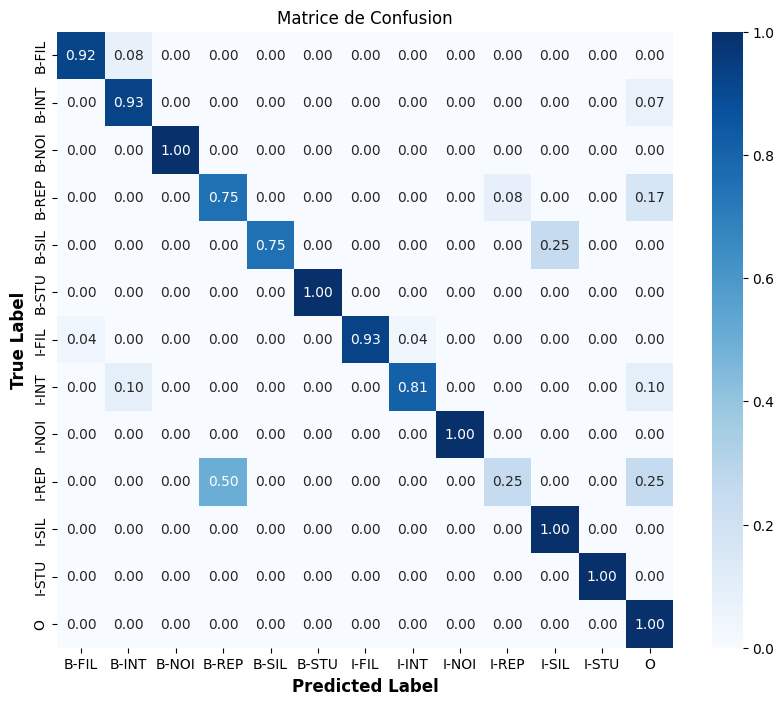


Classification report:
              precision    recall  f1-score   support

       B-FIL       0.96      0.92      0.94        26
       B-INT       0.76      0.93      0.84        14
       B-NOI       1.00      1.00      1.00         6
       B-REP       0.82      0.75      0.78        12
       B-SIL       1.00      0.75      0.86         4
       B-STU       1.00      1.00      1.00         3
       I-FIL       1.00      0.93      0.96        28
       I-INT       0.94      0.81      0.87        21
       I-NOI       1.00      1.00      1.00        30
       I-REP       0.50      0.25      0.33         4
       I-SIL       0.89      1.00      0.94         8
       I-STU       1.00      1.00      1.00        11
           O       1.00      1.00      1.00      1237

    accuracy                           0.99      1404
   macro avg       0.91      0.87      0.89      1404
weighted avg       0.99      0.99      0.99      1404


Evolution of accuracy and loss over the epoch:


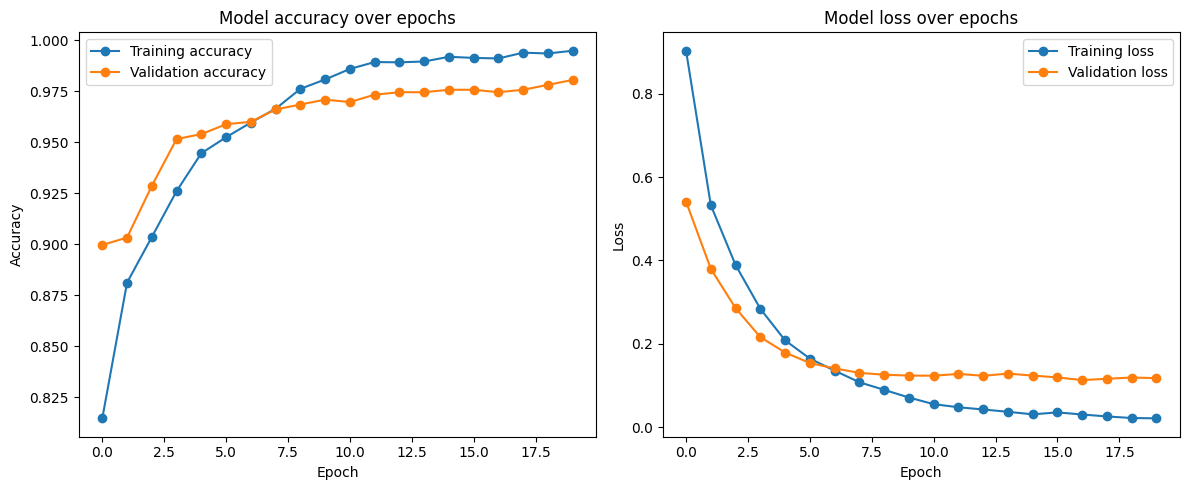


ROC AUC curve:


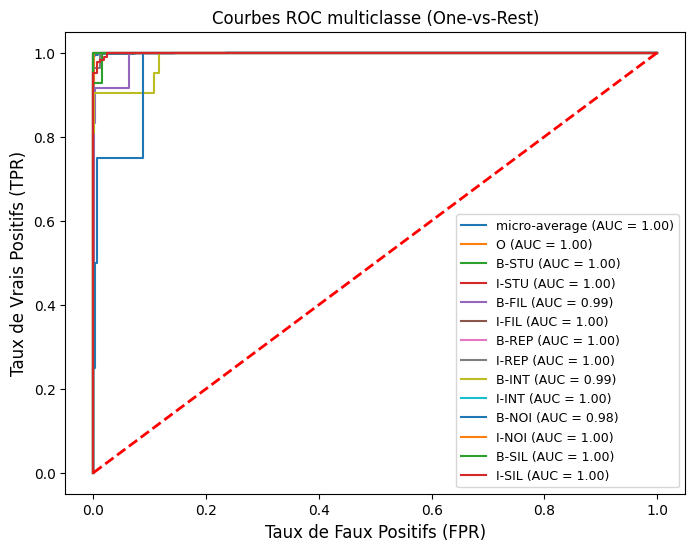

In [2]:
import os
import warnings
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'
tf.get_logger().setLevel('ERROR')
warnings.filterwarnings("ignore")
import numpy as np

from transformers import BertTokenizerFast, TFBertForTokenClassification
from utils_ner import encode_data, load_data, prepare_labels, evaluate_model, save_model, get_metrics, get_ROC_curve, plot_training_history


# access csv & load data
train_path = os.path.join(os.getcwd(), '..', 'data', 'train-data-derush.csv')
test_path = os.path.join(os.getcwd(), '..', 'data', 'test-data-derush.csv')
absolute_train_path = os.path.abspath(train_path)
absolute_test_path = os.path.abspath(test_path)

data_train, data_test = load_data(absolute_train_path, absolute_test_path) 

# encoding
unique_labels = ['O', 'B-STU', 'I-STU', 'B-FIL', 'I-FIL', 'B-REP', 'I-REP', 'B-INT', 'I-INT', 'B-NOI', 'I-NOI', 'B-SIL', 'I-SIL']
label_encoder = prepare_labels(unique_labels)

tokenizer = BertTokenizerFast.from_pretrained('google-bert/bert-base-multilingual-cased')

print("\n// Starting train data encoding...")
train_tokens, train_labels = encode_data(data_train, tokenizer, label_encoder, max_length=36)
print("\n// Starting test data encoding...")
test_tokens, test_labels = encode_data(data_test, tokenizer, label_encoder, max_length=36)

model = TFBertForTokenClassification.from_pretrained('google-bert/bert-base-multilingual-cased', num_labels=len(label_encoder.classes_))
print("-> model loaded with ", len(label_encoder.classes_), "labels")

# compile config
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# training
history = model.fit(train_tokens, train_labels, epochs=20, batch_size=16, validation_split=0.1)

# save
model_path = os.path.join(os.getcwd(), '..', 'API', 'models', 'bert-base-multilingual-cased')
absolute_model_path = os.path.abspath(model_path)
save_model(model, tokenizer, absolute_model_path)

# evaluate
evaluate_model(model, test_tokens, test_labels)

# Visualisation des métriques
test_pred = model.predict(test_tokens).logits
test_pred_labels = np.argmax(test_pred, axis=-1)

get_metrics(test_labels, test_pred_labels, label_encoder.classes_)
plot_training_history(history)
get_ROC_curve(true_labels=test_labels, logits=test_pred, unique_labels=unique_labels)

